# Problem Set 4

##  Fulin Guo

### Question 1

#### a.

In [164]:
import numpy as np
import matplotlib.pyplot as plt

In [165]:
income=np.loadtxt('incomes.txt')

Text(0, 0.5, 'Percent of incomes')

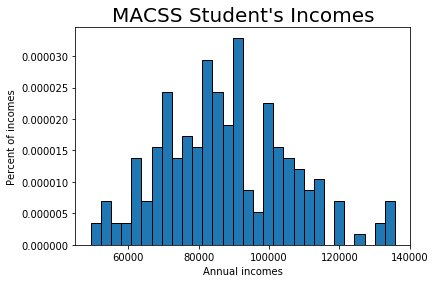

In [167]:
num=30
plt.hist(income, num, density=True,edgecolor='k')
plt.title("MACSS Student's Incomes", fontsize=20)
plt.xlabel('Annual incomes')
plt.ylabel('Percent of incomes')

#### b.

In [168]:
import scipy.stats
import math
def logpdf(x,mu,sigma,low,upp):
    if low==None and upp==None:
        cut=1
    elif low!=None and upp==None:
        #cut=1-scipy.stats.norm.cdf(math.log(low),loc=mu, scale=sigma)
        cut=1-scipy.stats.lognorm.cdf(low,loc=mu, s=sigma, scale=sigma)
    elif low==None and upp!=None:
        #cut=scipy.stats.norm.cdf(math.log(upp),loc=mu, scale=sigma)
        cut=scipy.stats.lognorm.cdf(upp,loc=mu, s=sigma,scale=sigma)
    elif low!=None and upp!=None:
        #cut=scipy.stats.norm.cdf(math.log(upp),loc=mu, scale=sigma)-scipy.stats.norm.cdf(math.log(low),loc=mu, scale=sigma)
        cut=scipy.stats.lognorm.cdf(upp,loc=mu, s=sigma, scale=sigma)-scipy.stats.lognorm.cdf(low,loc=mu, s=sigma,scale=sigma)
    
    ans=(1/(sigma*np.sqrt(2*np.pi)*x))*np.exp(-(((np.log(x)-mu)**2)/(2*(sigma**2))))/cut
    return ans

Text(0, 0.5, 'f(x)')

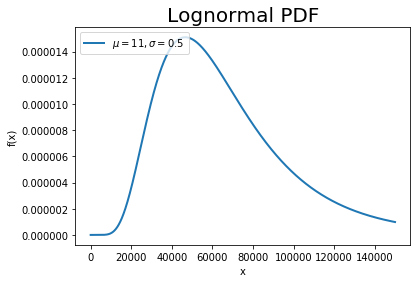

In [170]:
x=np.linspace(0.0001,150000,150000)
y=logpdf(x,11,0.5,0.0001,150000)
plt.plot(x,y,linewidth=2,label='$\mu=11,\sigma=0.5$')
plt.legend(loc='upper left')
plt.title("Lognormal PDF", fontsize=20)
plt.xlabel('x')
plt.ylabel('f(x)')

If we plot the pdf in b and the histogram together, we get:

Text(0, 0.5, 'Percent of incomes')

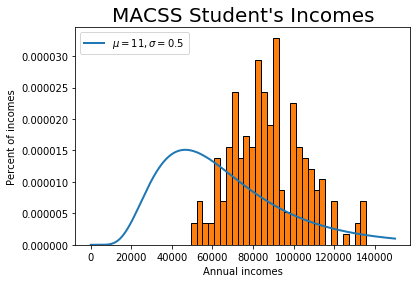

In [171]:
x=np.linspace(0.0001,150000,150000)
y=logpdf(x,11,0.5,0.0001,150000)
plt.plot(x,y,linewidth=2,label='$\mu=11,\sigma=0.5$')
num=30
plt.hist(income, num, density=True,edgecolor='k')
plt.legend(loc='upper left')
plt.title("MACSS Student's Incomes", fontsize=20)
plt.xlabel('Annual incomes')
plt.ylabel('Percent of incomes')

In [172]:
def loglike(para,*args):
    mu=para[0]
    sigma=para[1]
    x=args[0]
    low=args[1]
    upp=args[2]
    pdf=logpdf(x,mu,sigma,low,upp)
    lnpdf=np.log(pdf)
    ans=-lnpdf.sum()
    return ans
log_like=-loglike([11,0.5],income,0.0,150000)
print('The log likelihood value of this parameterization is:', log_like)

The log likelihood value of this parameterization is: -2385.856997808558


#### c.

In [173]:
import scipy.optimize as opt
mu0=11
sigma0=0.3
para0=np.array([mu0,sigma0])
mle_args = income, 0.0001, 150000
ans=opt.minimize(loglike, para0, args=(mle_args),method='L-BFGS-B',
                            bounds=((None, None), (10**(-10), None)))

In [174]:
est_pdf=logpdf(x,ans.x[0],ans.x[1],0.0001,150000)

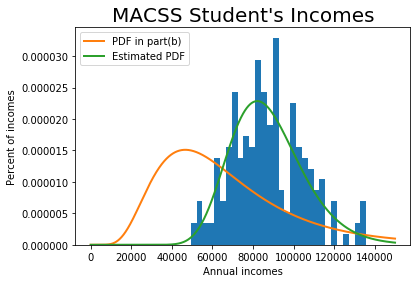

In [175]:
num=30
plt.hist(income, num, density=True)
plt.title("MACSS Student's Incomes", fontsize=20)
plt.xlabel('Annual incomes')
plt.ylabel('Percent of incomes')
plt.plot(x,y,linewidth=2,label='PDF in part(b)')
plt.plot(x,est_pdf,linewidth=2,label='Estimated PDF')
plt.legend(loc='upper left')

In [176]:
print('The estimated mu is:', ans.x[0])
print('The estimated sigma is:', ans.x[1])
print('The value of the likelihood function is:', ans.fun)
print('The variance-covariance matrix is:\n', ans.hess_inv.todense())

The estimated mu is: 11.359021470175717
The estimated sigma is: 0.2081762592656177
The value of the likelihood function is: 2241.7193013680426
The variance-covariance matrix is:
 [[0.00040354 0.00013189]
 [0.00013189 0.0002013 ]]


#### d.

In [177]:
log0 = -loglike([11, 0.5], income, 0.0001, 150000)
log_mle = -loglike([ans.x[0],ans.x[1]], income,0.0001, 150000)
lr=2*(log_mle - log0)
print('The likelihood ratio value is:', lr)
pval_h0 = 1.0 - scipy.stats.chi2.cdf(lr, 2)
print('The p-value is:', pval_h0)

The likelihood ratio value is: 288.2753928810307
The p-value is: 0.0


Therefore, we can reject the hypothesis that the data came from the model in part (b).

#### e.

In [178]:
p1=1-scipy.stats.norm.cdf(math.log(100000),loc=ans.x[0], scale=ans.x[1])
p2=scipy.stats.norm.cdf(math.log(75000),loc=ans.x[0], scale=ans.x[1])
print('The probability that I will earn more than $100,000 is:',p1)
print('The probability that I will earn less than $75,000 is:',p2)

The probability that I will earn more than $100,000 is: 0.22986346529476553
The probability that I will earn less than $75,000 is: 0.2602355851100345


### Question 2

In [179]:
q2= open('sick.txt', 'r')
data=q2.readlines()
sick=[]
age=[]
children=[]
temp_winter=[]
for i in range(1,len(data)):
    sick.append(float(data[i].split(',')[0]))
    age.append(float(data[i].split(',')[1]))
    children.append(float(data[i].split(',')[2]))
    temp_winter.append(float(data[i].split(',')[3]))
sick=np.array(sick)
age=np.array(age)
children=np.array(children)
temp_winter=np.array(temp_winter)
def logfunc(paras,*args):
    b0=paras[0]
    b1=paras[1]
    b2=paras[2]
    b3=paras[3]
    sigma=paras[4]
    sick=args[0]
    age=args[1]
    children=args[2]
    temp_winter=args[3]
    epsilon=sick-b0-b1*age-b2*children-b3*temp_winter
    ans=[]
    for i in epsilon:
        pdf=scipy.stats.norm.pdf(i,loc=0, scale=sigma)
        if pdf==0:
            pdf=10**(-10)
        ans.append(math.log(pdf))
    return -sum(ans)

In [180]:
para0=np.array([1,0,0,0,0.1])
mle_args = sick,age,children,temp_winter
ans2=opt.minimize(logfunc, para0, args=(mle_args),method='L-BFGS-B',
                            bounds=((None, None),(None, None),(None, None),(None, None), (10**(-10), None)))

In [181]:
print('The estimated outcome is:\n',[ans2.x[0],ans2.x[1],ans2.x[2],ans2.x[3],ans2.x[4]**2]) # The last is the estimated sigma^2, not sigma

The estimated outcome is:
 [0.25164477895501486, 0.012933452821221334, 0.4005011411305032, -0.009991696820585124, 9.106491815821832e-06]


The estimated $\beta_{0}$ is 0.252

The estimated $\beta_{1}$ is 0.013

The estimated $\beta_{2}$ is 0.401

The estimated $\beta_{3}$ is -0.010

The estimated $\sigma^{2}$ is $9.106\times10^{-6}$

Or, the estimated $\sigma$ is 0.003

In [182]:
print('The value of the log likelihood function is:',ans2.fun)

The value of the log likelihood function is: -876.8650639051816


In [183]:
print('The variance-covariance matrix is:\n', ans2.hess_inv.todense())

The variance-covariance matrix is:
 [[ 5.35300108e+03  1.36181396e+02 -1.49632390e+03 -1.78585689e+02
   8.17661863e+02]
 [ 1.36181396e+02  3.47675589e+00 -3.81929048e+01 -4.54919297e+00
   2.08694359e+01]
 [-1.49632390e+03 -3.81929048e+01  4.19565834e+02  4.99810033e+01
  -2.29261186e+02]
 [-1.78585689e+02 -4.54919297e+00  4.99810033e+01  5.96081203e+00
  -2.73114841e+01]
 [ 8.17661863e+02  2.08694359e+01 -2.29261186e+02 -2.73114841e+01
   1.25275180e+02]]


In [184]:
log0 = -logfunc(np.array([1,0,0,0,0.1]), sick,age,children,temp_winter)
log_mle = -logfunc(ans2.x, sick,age,children,temp_winter)
lr=2 * (log_mle - log0)
print('The likelihood ratio value is:',lr)
pval_h0 = 1.0 - scipy.stats.chi2.cdf(lr, 5)
print('The p-value is', pval_h0)

The likelihood ratio value is: 6261.131503894614
The p-value is 0.0


Therefore, we should reject the hypothesis that age, number of children, and average winter tamperature have no effect on the number of sick days.